In [11]:
from hnn_core import simulate_dipole, calcium_model, MPIBackend
from hnn_core.viz import plot_dipole
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from utils import add_supra_beta_drives, rescale_pyr_morph
sns.set()

In [ ]:
cell_name = 'L5_pyramidal'
overide_params = {
    'L5Pyr_soma_gkbar_hh2': 0.06,
    'L5Pyr_soma_gnabar_hh2': 0.32
}
pos = net_orig.cell_types[cell_name].pos
net_orig.cell_types[cell_name] = pyramidal_ca(
    cell_name=_short_name(cell_name), pos=pos)

In [12]:
%%capture
#scaling_factors = [1, .5, .2]
scaling_factors = [0.2]
props = ['L', 'diam', 'Ra', 'cm']
pyr_cells = ['L2_pyramidal', 'L5_pyramidal']

net_list = list()
dpl_list = list()
for scaling_factor in scaling_factors:
    net = net_orig.copy()
    add_supra_beta_drives(net, beta_start=200, strength=1/scaling_factor)
    for prop in props:        
        if prop == 'cm':
            scaling_factor = 1/scaling_factor
        rescale_pyr_morph(net=net, cell_types=pyr_cells, compartment_prop=prop, scaling_factor=scaling_factor)
    with MPIBackend(n_procs=8):
        dpl = simulate_dipole(net, tstop=500)

    net_list.append(net.copy())
    dpl_list.append(dpl[0].copy())


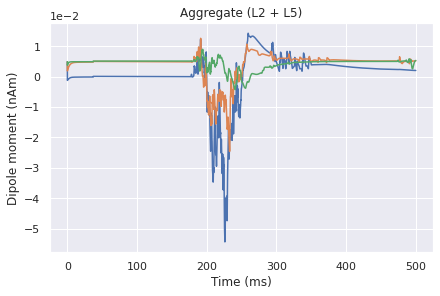

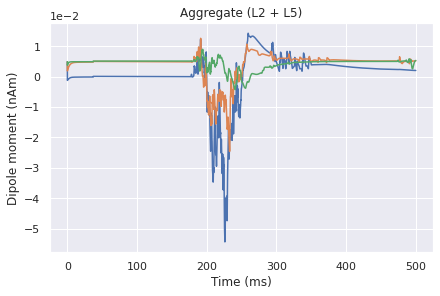

In [13]:
plot_dipole(dpl_list)

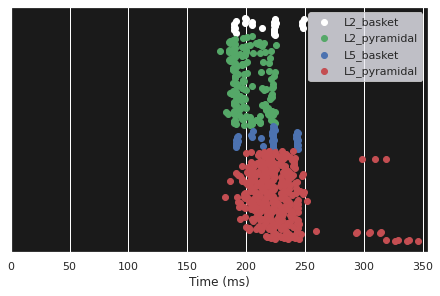

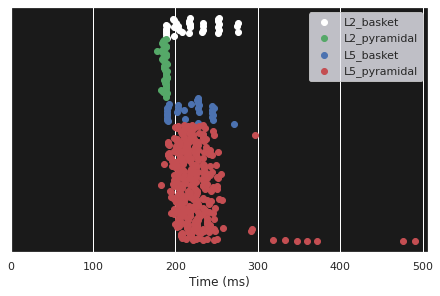

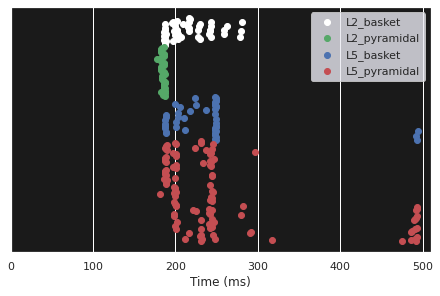

In [14]:
for net in net_list:
    net.cell_response.plot_spikes_raster()
